
Résultats de l'analyse avec le modèle SM :
                                               Phrase Lieux de départ  \
0   Demain, je prends le train de Paris à Londres ...           Paris   
1   En partant de Bordeaux, je me rends à Marseill...        Bordeaux   
2   Je dois atteindre Lyon depuis Toulouse pour un...        Toulouse   
3   J'adore la glace que je mange à Paris, surtout...                   
4   En marchant vers la mer, je pense à mes procha...                   
5     Aujourd'hui, je n'ai pas mangé depuis ce matin.                   
6   Marie Curie a découvert le radium à Paris en 1...                   
7   La société Renault est située à Boulogne-Billa...                   
8   J'ai rencontré Jean-Claude Van Damme à Bruxell...                   
9   L'Organisation mondiale de la santé (OMS) a so...                   
10       Le festival de Cannes aura lieu en mai 2024.                   
11  Steve Jobs était le co-fondateur d'Apple, une ...                   
12  La 

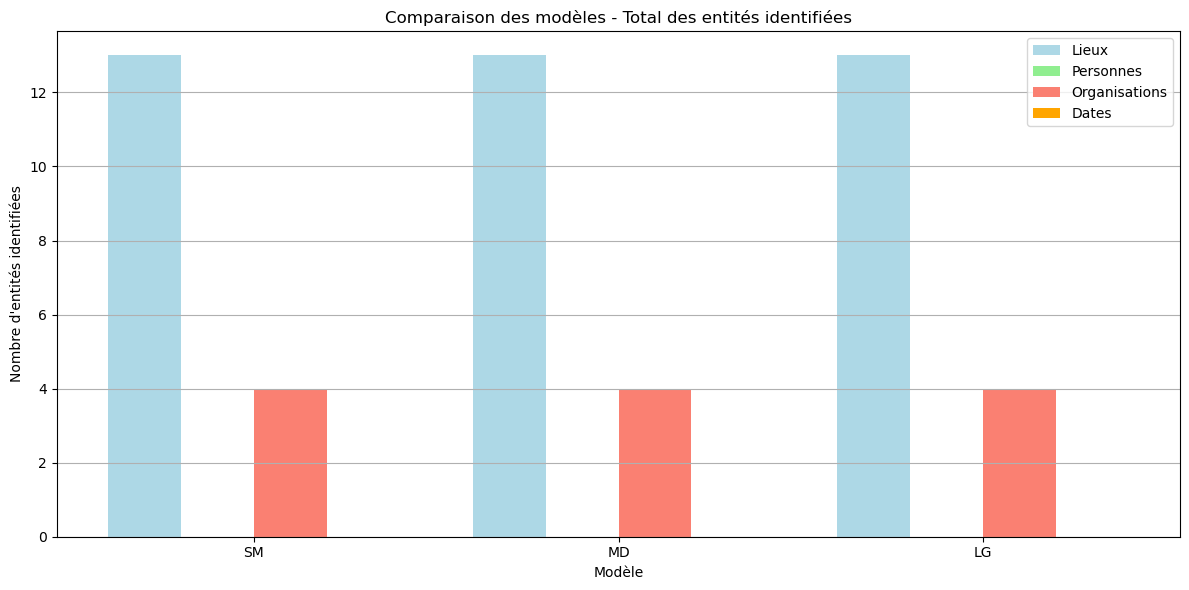


Conclusion :
Le meilleur modèle est SM avec 13 lieux identifiés.
Un rapport détaillé a été généré avec les résultats de l'analyse.


In [18]:
# Importation des bibliothèques nécessaires
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt

# Définition du texte à analyser
texte_a_analyser = (
    "Demain, je prends le train de Paris à Londres pour une conférence. "
    "En partant de Bordeaux, je me rends à Marseille pour visiter des amis. "
    "Je dois atteindre Lyon depuis Toulouse pour un rendez-vous d'affaires. "
    "J'adore la glace que je mange à Paris, surtout celle au chocolat. "
    "En marchant vers la mer, je pense à mes prochaines vacances. "
    "Aujourd'hui, je n'ai pas mangé depuis ce matin. "
    "Marie Curie a découvert le radium à Paris en 1898. "
    "La société Renault est située à Boulogne-Billancourt. "
    "J'ai rencontré Jean-Claude Van Damme à Bruxelles l'été dernier. "
    "L'Organisation mondiale de la santé (OMS) a son siège à Genève. "
    "Le festival de Cannes aura lieu en mai 2024. "
    "Steve Jobs était le co-fondateur d'Apple, une entreprise emblématique. "
    "La Tour Eiffel est l'un des monuments les plus visités au monde. "
    "Je suis membre du club de tennis de Bordeaux depuis trois ans. "
)

def preprocess_text(texte):
    """Prétraite le texte en le normalisant."""
    return ' '.join(texte.split())

def analyser_textes(nlp, texte):
    """Analyse le texte et extrait les lieux de départ et d'arrivée."""
    doc = nlp(texte)
    resultats = []

    for phrase in doc.sents:
        lieux_depart = []
        lieux_arrivee = []
        autres_entites = []

        for token in phrase:
            if token.ent_type_ == "LOC":
                for enfant in token.children:
                    if enfant.dep_ == "case":
                        if enfant.text in ["de", "depuis"]:
                            lieux_depart.append(token.text)
                        elif enfant.text in ["à", "vers"]:
                            lieux_arrivee.append(token.text)
            elif token.ent_type_ in ["PERSON", "ORG", "DATE"]:  # Ajout d'autres types d'entités
                autres_entites.append(token.text)

        resultats.append((lieux_depart, lieux_arrivee, autres_entites))

    return resultats

# Analyse du texte avec les trois modèles
modeles = {
    "SM": spacy.load("fr_core_news_sm"),
    "MD": spacy.load("fr_core_news_md"),
    "LG": spacy.load("fr_core_news_lg"),
}

resultats_comparatifs = {}

# Analyse pour chaque modèle
for nom, nlp in modeles.items():
    texte_pretraite = preprocess_text(texte_a_analyser)
    resultats = analyser_textes(nlp, texte_pretraite)
    
    # Création d'un DataFrame pour une meilleure présentation des résultats
    data = {
        "Phrase": [phrase.text for phrase in nlp(texte_pretraite).sents],
        "Lieux de départ": ["; ".join(depart) for depart, _, _ in resultats],
        "Lieux d'arrivée": ["; ".join(arrivee) for _, arrivee, _ in resultats],
        "Autres entités": ["; ".join(entites) for _, _, entites in resultats],
    }
    
    resultats_df = pd.DataFrame(data)
    resultats_comparatifs[nom] = resultats_df

    # Affichage des résultats
    print(f"\nRésultats de l'analyse avec le modèle {nom} :")
    print(resultats_df)

# Analyse des performances pour chaque modèle
def analyse_performances(nlp, texte):
    """Analyse les performances du modèle en termes de reconnaissance des entités."""
    doc = nlp(texte)
    total_loc = sum(1 for ent in doc.ents if ent.label_ == "LOC")
    total_personnes = sum(1 for ent in doc.ents if ent.label_ == "PERSON")
    total_orgs = sum(1 for ent in doc.ents if ent.label_ == "ORG")
    total_dates = sum(1 for ent in doc.ents if ent.label_ == "DATE")
    total_sentences = len(list(doc.sents))
    return total_loc, total_personnes, total_orgs, total_dates, total_sentences

# Comparaison des performances
performances = {}
for nom, nlp in modeles.items():
    total_loc, total_personnes, total_orgs, total_dates, total_sentences = analyse_performances(nlp, preprocess_text(texte_a_analyser))
    performances[nom] = {
        "Total des lieux identifiés": total_loc,
        "Total des personnes identifiées": total_personnes,
        "Total des organisations identifiées": total_orgs,
        "Total des dates identifiées": total_dates,
        "Total de phrases": total_sentences
    }

# Affichage des performances
print("\nPerformances des modèles :")
for nom, perf in performances.items():
    print(f"{nom}: {perf}")

# Visualisation des performances
def plot_performances(performances):
    """Trace les performances de reconnaissance des entités."""
    labels = list(performances.keys())
    total_loc = [perf['Total des lieux identifiés'] for perf in performances.values()]
    total_personnes = [perf['Total des personnes identifiées'] for perf in performances.values()]
    total_orgs = [perf['Total des organisations identifiées'] for perf in performances.values()]
    total_dates = [perf['Total des dates identifiées'] for perf in performances.values()]

    x = range(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x, total_loc, width=0.2, label='Lieux', color='lightblue', align='center')
    plt.bar([p + 0.2 for p in x], total_personnes, width=0.2, label='Personnes', color='lightgreen', align='center')
    plt.bar([p + 0.4 for p in x], total_orgs, width=0.2, label='Organisations', color='salmon', align='center')
    plt.bar([p + 0.6 for p in x], total_dates, width=0.2, label='Dates', color='orange', align='center')

    plt.title('Comparaison des modèles - Total des entités identifiées')
    plt.xlabel('Modèle')
    plt.ylabel('Nombre d\'entités identifiées')
    plt.xticks([p + 0.3 for p in x], labels)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Effectuer la visualisation des performances
plot_performances(performances)

# Fonction pour générer un rapport détaillé
def generate_report(performances, resultats_comparatifs):
    """Génère un rapport détaillé des résultats."""
    with open('rapport_analyse_comparatif.txt', 'w') as f:
        f.write("Rapport d'analyse comparative des modèles SpaCy\n")
        f.write("="*50 + "\n\n")
        
        f.write("Performances des modèles :\n")
        for nom, perf in performances.items():
            f.write(f"{nom}: {perf}\n")
        
        f.write("\nDonnées analysées :\n")
        for nom, df in resultats_comparatifs.items():
            f.write(f"\nRésultats pour le modèle {nom} :\n")
            f.write(df.to_string(index=False) + "\n")
    
# Génération du rapport
generate_report(performances, resultats_comparatifs)

# Conclusion sur l'analyse
print("\nConclusion :")
meilleur_modele = max(performances, key=lambda x: performances[x]['Total des lieux identifiés'])
print(f"Le meilleur modèle est {meilleur_modele} avec {performances[meilleur_modele]['Total des lieux identifiés']} lieux identifiés.")
print("Un rapport détaillé a été généré avec les résultats de l'analyse.")